### **CALIFORNIA HOUSE**

### **LIBRERIE & IMPORT**

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
# Funzione che serve ad effettuare la divisione tra train set e test set
from sklearn.model_selection import train_test_split
# Metriche per definire la qualità del modello generato
from sklearn.metrics import accuracy_score, mean_squared_error
# Per Scaling dei dati
from sklearn.preprocessing import StandardScaler
# Modello per la Regressione Lineare
from sklearn.linear_model import LinearRegression
# Neural Network Regression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

### **CREAZIONE DATAFRAME HOUSE**

In [25]:
# WTF perchè da errore 403 Forbidden
"""
california = fetch_california_housing()
df_house = pd.DataFrame(california.data, columns=california.feature_names)
df_house["target"] = california.target

df_house.head()
"""

'\ncalifornia = fetch_california_housing()\ndf_house = pd.DataFrame(california.data, columns=california.feature_names)\ndf_house["target"] = california.target\n\ndf_house.head()\n'

In [26]:
# Read csv from local sample, Dati grezzi e un po' diversi dalle slide
"""
df_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

df_house_local = pd.concat([df_train, df_test], ignore_index=True)

# Rename the target column to 'target' to align with the original code's intent
df_house_local = df_house_local.rename(columns={'median_house_value': 'target'})

display(df_house_local.head())
"""

"\ndf_train = pd.read_csv('/content/sample_data/california_housing_train.csv')\ndf_test = pd.read_csv('/content/sample_data/california_housing_test.csv')\n\ndf_house_local = pd.concat([df_train, df_test], ignore_index=True)\n\n# Rename the target column to 'target' to align with the original code's intent\ndf_house_local = df_house_local.rename(columns={'median_house_value': 'target'})\n\ndisplay(df_house_local.head())\n"

In [27]:
# Read csv from repo GitHub, Dati grezzi molto simili alle slide
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df_house = pd.read_csv(url)

df_house = df_house.rename(columns={'median_house_value': 'target'})
df_house = df_house.drop("ocean_proximity", axis=1)

display(df_house.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [28]:
# IL DATASET è GREZZO quindi devo pulire i dati e calcolare le avg necessarie

# Normalizzo eventuali valori NaN = 0
df_house = df_house.fillna(0)

# Calcolo le avg
df_house["AveRooms"]  = df_house["total_rooms"] / df_house["households"]
df_house["AveBedrms"] = df_house["total_bedrooms"] / df_house["households"]
df_house["AveOccup"]  = df_house["population"] / df_house["households"]
df_house["target"] = df_house["target"] / 100000

# Rinomino colonne
df_house = df_house.rename(columns={'median_income': 'MedInc',
                                    'housing_median_age': 'HouseAge'
                                   })
# Ordino le colonne
df_house_final = df_house[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'population', 'AveOccup', 'latitude', 'longitude','target']]

display(df_house_final.head())

,MedInc,HouseAge,AveRooms,AveBedrms,population,AveOccup,latitude,longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### **VISUALIZZAZIONE DATI**

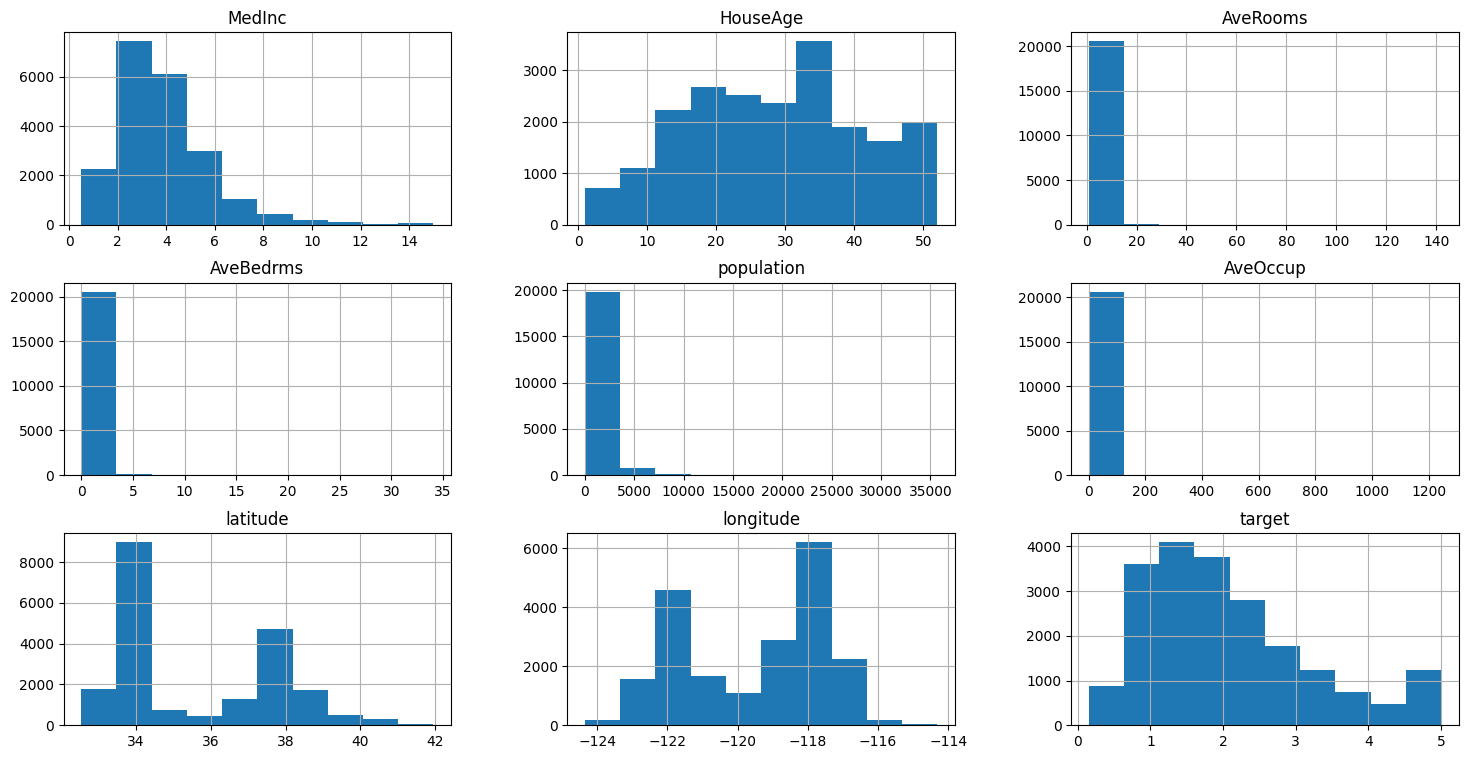

In [29]:
df_house_final.hist(figsize = (18,9))
plt.show()

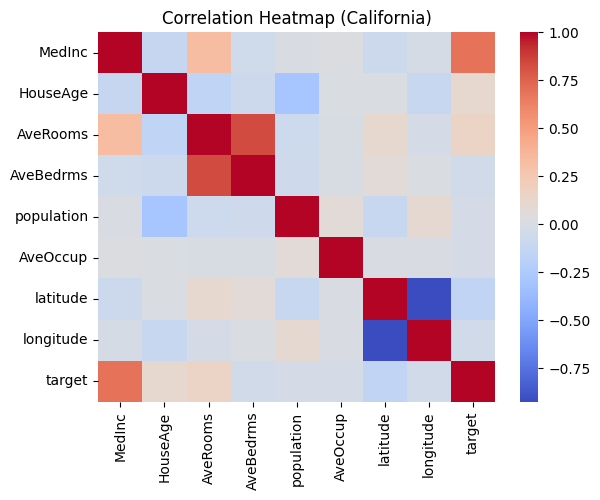

In [30]:
sns.heatmap(df_house_final.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (California)")

# E' la mappa che ci mostra la correlazione tra tutti i dati visualizzati
# Colori simili indicano una stretta correlazione, colori diversi una debole correlazione
plt.show()

In [31]:
X = df_house_final.drop("target", axis=1)
y = df_house_final["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### **ROCESSING DEI DATI - SCALING**

In [32]:

# Normalizzo i dati applicando lo scaling
scaler = StandardScaler()
# Training: calcola media e deviazione std dai dati di training
X_train_scaled = scaler.fit_transform(X_train)
# Test: usa gli STESSI parametri di training
X_test_scaled = scaler.transform(X_test)

# I parametri creati con fit_transform() vengono salvati temporaneamente in scaler durante la run e riusati con .transform()

print(scaler.mean_)   # Media di ogni feature
print(scaler.scale_,"\n")  # Deviazione standard di ogni feature


[ 3.87689155e+00  2.85753738e+01  5.43812463e+00  1.09803314e+00
  1.42792733e+03  3.11923650e+00  3.56506693e+01 -1.19584102e+02]
[1.90484248e+00 1.26131971e+01 2.45348438e+00 4.47482496e-01
 1.14018573e+03 1.23732074e+01 2.13566827e+00 2.00286090e+00] 



### **MEAN SQUARE ERROR**

In [48]:
# Lo scaling Migliora la MLP di -0.20, peggiora la LR e DTR di +0.1

regressors = {
    "Linera Regression": LinearRegression(),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,50), max_iter=10000, random_state=42), # Scalando i dati e settando i layer 100, 50 Migliora il risultato
    "Decision Tree (4)": DecisionTreeRegressor(max_depth=4),
    "Decision Tree (10)": DecisionTreeRegressor(max_depth=10)
}

for name, models in regressors.items():
    models.fit(X_train_scaled, y_train)
    mlp = reg.regressor_.named_steps["mlp"]
    print("n_iter:", mlp.n_iter_)
    print("loss:", mlp.loss_)
    preds = models.predict(X_test_scaled)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} MSE: {mse:.2f}\n")

n_iter: 24
loss: 0.3934460308818273
Linera Regression MSE: 0.55

n_iter: 24
loss: 0.3934460308818273
Neural Network MSE: 0.40

n_iter: 24
loss: 0.3934460308818273
Decision Tree (4) MSE: 0.57

n_iter: 24
loss: 0.3934460308818273
Decision Tree (10) MSE: 0.42



### **NEURAL NETWORK**

In [49]:
# Verifico se settando dei paramentri specifici posso abbassare la MSE

# Creo una pipe per gestire lo Scaling e il setting del Modello MLP
pipe = Pipeline([
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(100,50),
        learning_rate_init=1e-3, # NON Migliora
        alpha=1e-4, # NON Migliora
        max_iter=10000,
        random_state=42)
    )
])

# Scaliamo y_train e y_test (NON Migliora la MSE)
reg = TransformedTargetRegressor(
    regressor=pipe,
    transformer=StandardScaler()
)

# Addestro il modello sui dati y scalati MLP
reg.fit(X_train, np.asarray(y_train).ravel())
mlp = reg.regressor_.named_steps["mlp"]
print("n_iter:", mlp.n_iter_)
print("loss:", mlp.loss_)
# Valuta le predizioni
y_pred = reg.predict(X_test)

print("Neural Network MSE:", round(mean_squared_error(np.asarray(y_test).ravel(), y_pred),2))

n_iter: 44
loss: 0.6809435621243465
Neural Network MSE: 0.69


Text(0.5, 1.0, 'MedInc vs Target')

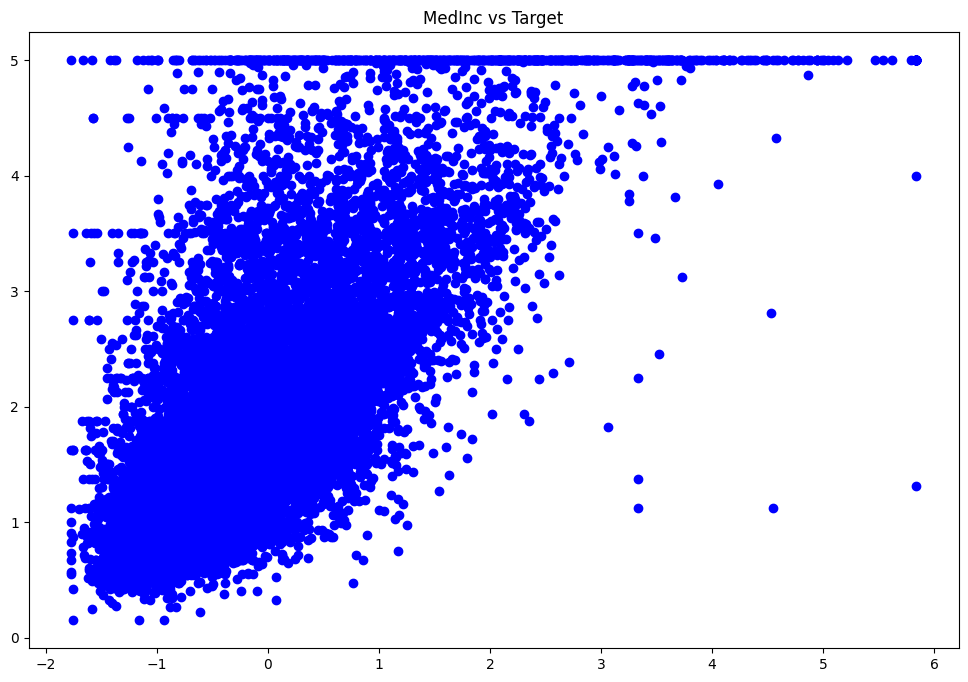

In [53]:
# Plottind Data
plt.figure(figsize=(12, 8))
plt.plot(X_train_scaled[:,0], np.asarray(y_train).ravel(), 'bo')
plt.title("MedInc vs Target")